In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
repos_path="/content/drive/MyDrive/"
print("Contents:",os.listdir(repos_path))

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
reposi_path="/content/drive/MyDrive/Tree_Species_Dataset"
!cp -r "/content/drive/MyDrive/Tree_Species_Dataset" /content/
reposi_path = "/content/Tree_Species_Dataset"
print("Contents:",os.listdir(reposi_path))

Contents: ['coconut', 'sonmahor', 'bamboo', 'kesudo', 'sitafal', 'simlo', 'saptaparni', 'neem', '.git', 'gulmohor', 'vad', 'babul', 'mango', 'motichanoti', 'khajur', 'other', 'champa', 'kanchan', 'nilgiri', 'gunda', 'sugarcane', 'jamun', 'pilikaren', 'cactus', 'amla', 'shirish', 'pipal', 'banyan', 'bili', 'asopalav', 'garmalo']


In [ ]:
class_dirs=os.listdir(reposi_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(reposi_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


           Image Count
other              125
neem                50
bamboo              50
sugarcane           50
khajur              49
shape:  (31, 1)


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(reposi_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(reposi_path, class_dir)
        image_files = os.listdir(class_path)

        if len(image_files) == 0:
            continue  # skip if no images in the class

        img_path = os.path.join(class_path, image_files[0])  # take the first image
        img = Image.open(img_path)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()


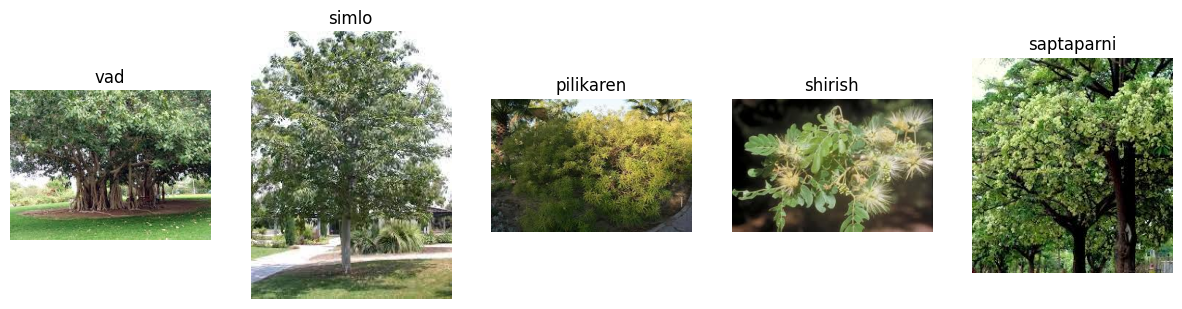

In [ ]:
reposi_path = "/content/drive/MyDrive/Tree_Species_Dataset"  # or your dataset extract path
class_dirs = os.listdir(reposi_path)
show_sample_images(reposi_path, class_dirs)


In [ ]:
from PIL import Image, UnidentifiedImageError
import os
import pandas as pd

image_shapes = []

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

for class_dir in class_dirs:
    class_path = os.path.join(reposi_path, class_dir)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(valid_extensions):  # filter only image files
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)
            except UnidentifiedImageError:
                print(f"Skipped corrupted or unreadable file: {img_path}")


In [ ]:
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()


,Width,Height
0,259,194
1,259,194
2,251,201
3,224,225
4,275,183


In [ ]:
print(shapes_df.describe())


             Width       Height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(reposi_path, class_dir)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path):
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(reposi_path, class_dir)):
        img_path = os.path.join(reposi_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 2


In [ ]:
for img_path in corrupt_images:
    if os.path.isfile(img_path):
        os.remove(img_path)
        print(f"Removed corrupt image: {img_path}")

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 0 duplicate images.


In [ ]:
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(reposi_path, class_dir)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path):
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))



Duplicate image sets found: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(reposi_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 0
🔺 Very large images: 0


In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 0 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(reposi_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    reposi_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    reposi_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.0679 - loss: 3.4651 - val_accuracy: 0.0903 - val_loss: 3.4024
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.0640 - loss: 3.4199 - val_accuracy: 0.0903 - val_loss: 3.3883
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.0749 - loss: 3.4202 - val_accuracy: 0.0903 - val_loss: 3.3890
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.0884 - loss: 3.3875 - val_accuracy: 0.0903 - val_loss: 3.3852
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.0879 - loss: 3.4006 - val_accuracy: 0.0903 - val_loss: 3.3838
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.0808 - loss: 3.3984 - val_accuracy: 0.0903 - val_loss: 3.3811
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.0817 - loss: 3.3953 - val_accuracy: 0.0903 - val_loss: 3.3787
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.0806 - loss: 3.4066 - val_accuracy: 0.0903 - v

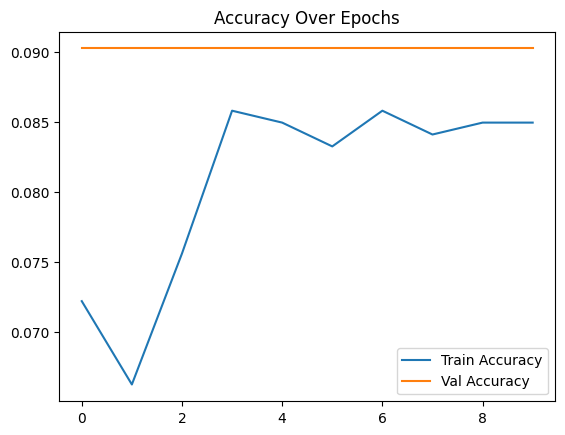

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    reposi_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    reposi_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.0711 - loss: 4.2628 - val_accuracy: 0.0903 - val_loss: 3.2809
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.0948 - loss: 3.3196 - val_accuracy: 0.0939 - val_loss: 3.1386
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 180s 5s/step - accuracy: 0.1089 - loss: 3.1223 - val_accuracy: 0.1372 - val_loss: 2.9642
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 170s 5s/step - accuracy: 0.1483 - loss: 3.0110 - val_accuracy: 0.1625 - val_loss: 2.9264
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.1806 - loss: 2.9541 - val_accuracy: 0.1841 - val_loss: 2.8374
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.1824 - loss: 2.8618 - val_accuracy: 0.2202 - val_loss: 2.8214
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 180s 5s/step - accuracy: 0.1930 - loss: 2.8269 - val_accuracy: 0.1697 - val_loss: 2.9230
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.1959 - loss: 2.8276 - val_accuracy: 0.2347 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


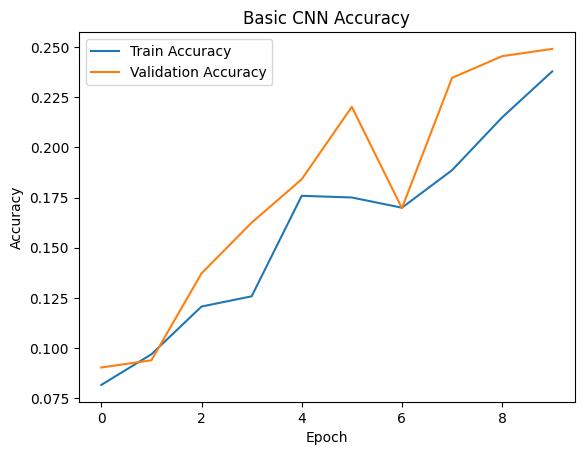

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step - accuracy: 0.0784 - loss: 5.2119 - val_accuracy: 0.0289 - val_loss: 8.1816
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.1116 - loss: 3.2427 - val_accuracy: 0.0289 - val_loss: 16.9600
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 272s 7s/step - accuracy: 0.1117 - loss: 3.2517 - val_accuracy: 0.0289 - val_loss: 22.0202
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 251s 7s/step - accuracy: 0.1508 - loss: 3.0969 - val_accuracy: 0.0289 - val_loss: 29.0127
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 260s 7s/step - accuracy: 0.1678 - loss: 3.0402 - val_accuracy: 0.0289 - val_loss: 31.2434
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.1456 - loss: 3.1036 - val_accuracy: 0.0289 - val_loss: 30.2927
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step - accuracy: 0.1437 - loss: 3.1265 - val_accuracy: 0.0289 - val_loss: 27.4020
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 252s 7s/step - accuracy: 0.1846 - loss: 3.0090 - val_accuracy: 0.03

In [13]:
!pip install streamlit --quiet
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇
changed 22 packages in 1s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [15]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the CNN model (make sure this path is correct)
model = tf.keras.models.load_model("/content/drive/MyDrive/improved_cnn_model (1).h5")

# Class labels (update if needed)
class_names = ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus',
               'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun',
               'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem',
               'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish',
               'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']

st.title("🌳 Tree Species Identification")

uploaded_file = st.file_uploader("Upload a leaf image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("🔍 Classifying...")

    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    st.success(f"✅ Prediction: {predicted_class} ({confidence:.2%} confidence)")


Overwriting app.py


In [16]:
%%writefile start_app.sh
#!/bin/bash
streamlit run app.py --server.headless true --server.port 8501


Overwriting start_app.sh


In [17]:
!chmod +x start_app.sh


In [18]:
import subprocess
import time

# Launch Streamlit
process = subprocess.Popen(["bash", "start_app.sh"])
print("⏳ Launching Streamlit...")
time.sleep(20)  # Increase if your model takes longer to load
# IMPORTANT: use a UNIQUE subdomain to avoid password issues
!npx localtunnel --port 8501 --subdomain treeiddemo12345



⏳ Launching Streamlit...
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://treeiddemo12345.loca.lt
y
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:18747 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

In [20]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.166.132:8501

⠦⠧⠇⠏your url is: https://four-yaks-flow.loca.lt
  Stopping...
^C
